<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/03%20Machine%20Learning/notebooks/soluciones/13-Practica-04-SOL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# California Housing Dataset

Este dataset fue utilizado en el segundo capítulo del libro de Aurélien Géron *Hands-On Machine learning with Scikit-Learn and TensorFlow*. Sirve como una excelente introducción a la implementación de algoritmos de aprendizaje automático, ya que requiere una limpieza de datos rudimentaria, tiene una lista de variables fácilmente comprensible y tiene un equilibrio entre ser directo y engorroso.

Los datos contienen información del censo de California de 1990. Así que, aunque puede que sea de mucha ayuda para predecir los precios de viviendas actuales, proporciona un conjunto de datos introductorio accesible para mostrar los fundamentos del aprendizaje automático.

🎯 En esta práctica buscaremos construimos el mejor predictor posible usando las técnicas de Machine Learning vistas hasta ahora:

* Preprocesamiento y escalamiento.
* Selección de features y reducción de dimensionalidad.
* Algoritmos para la tarea de regresión.

## Instrucciones

1. Entrena un modelo de regresión lineal con el dataset completo, sin re-escalamiento ni reducción de dimensionalidad. Reporta la métrica de rendimiento MAE. *Esta será tu baseline*.
2. Prueba diferentes modelos combinando las técnicas de re-escalamiento y reducción de dimensionalidad que consideres para obtener un mejor rendimiento MAE. Reporta tus parámetros. Puedes usar también otros algoritmos para regresión: Regresión Polinomial, Regresión con regularización, [Árboles de decisión (regresión)](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html), [Random Forest (regresión)](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html), [k-vecinos cercanos](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor), etc.

Algunos resultados:

* KNN-regresor de grado 1 - No PCA - StdScaler - Todas las fts - 42508.15
* KNN-regresor de grado 1 - PCA (todas) - StdScaler - Todas las fts - 42508.15
* Regresión Lineal de grado 2 - PCA (7) - StdScaler - 45180.88
* KNN-regresor de grado 1 - PCA (7) - StdScaler - Sin
`housing_median_age` 41442.15
* KNN-regressor de grado 1 - No PCA - StdScaler - Features: longitude-latitude - 35069.47

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_squared_error, mean_absolute_error

In [ ]:
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


Veamos las correlaciones entre las variables independientes y la variable dependiente:

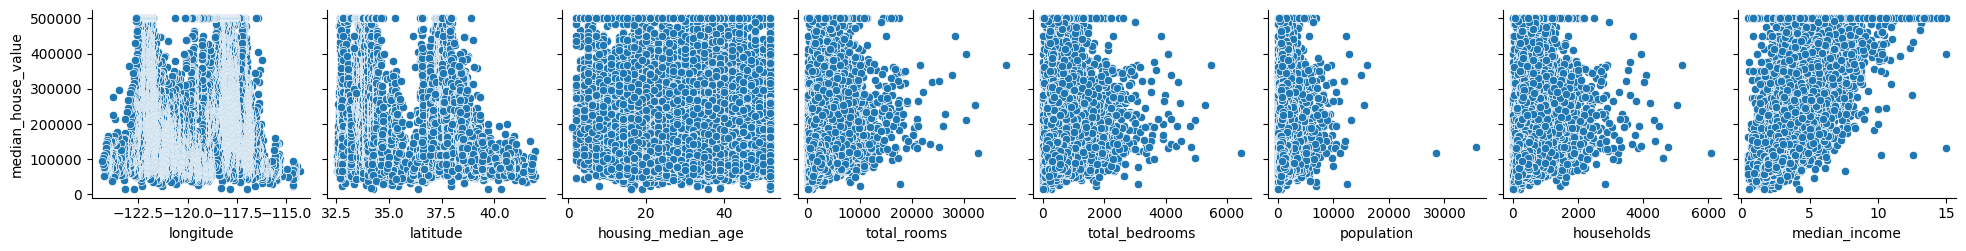

In [ ]:
import seaborn as sns

sns.pairplot(df,x_vars=df.columns.to_list()[:-1], y_vars=['median_house_value'])

Separación de los datos en $X$ y $y$, tomando en cuenta todas las features

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

print(X.shape)
print(y.shape)

(17000, 8)
(17000,)


❌ Si no tomamos en cuenta la variable `housing_median_age`

In [ ]:
X = df.iloc[:,[0,1,3,4,5,6,7]].values

print(X.shape)
print(y.shape)

(17000, 7)
(17000,)


División en entrenamiento y prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2024)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12750, 7)
(4250, 7)
(12750,)
(4250,)


## Baseline

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

print(f"MAE: {mean_absolute_error(y_test, y_pred)}")

MAE: 51772.79136396343


## Con escalamiento

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")

MAE: 51772.79136396219


## Con reducción de dimensionalidad

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

pca.explained_variance_ratio_

array([9.48131218e-01, 4.66653152e-02, 4.77777521e-03, 4.24030258e-04,
       1.25043633e-06, 3.70049891e-07, 4.05835708e-08])

Exploremos todas las opciones de número de componentes principales y su efecto en la clasificación:

In [ ]:
for n_dim in range(1, X_train.shape[1]+1):
    lr_pca = LinearRegression()
    lr_pca.fit(X_train_pca[:,:n_dim], y_train)
    y_pred_pca = lr_pca.predict(X_test_pca[:,:n_dim])
    print(f"n_dim: {n_dim}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")

n_dim: 1
MAE: 51772.79136396219
n_dim: 2
MAE: 51772.79136396219
n_dim: 3
MAE: 51772.79136396219
n_dim: 4
MAE: 51772.79136396219
n_dim: 5
MAE: 51772.79136396219
n_dim: 6
MAE: 51772.79136396219
n_dim: 7
MAE: 51772.79136396219


## GridSearch: Regresión Polinomial con PCA

Busqueda para encontrar la mejor combinación de Regresión polinomial con PCA

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

pl = Pipeline(steps=[('scaler', StandardScaler()),
                     ('pca', PCA()),
                     ('pf', PolynomialFeatures(include_bias=False)),
                     ('lr', LinearRegression())])

params_grid = {'pca__n_components': [1,2,3,4,5,6,7,8],
               'pf__degree': [1,2,3,4,5],
                }
gs = GridSearchCV(pl, param_grid=params_grid)
gs.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('pf',
                                        PolynomialFeatures(include_bias=False)),
                                       ('lr', LinearRegression())]),
             param_grid={'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8],
                         'pf__degree': [1, 2, 3, 4, 5]})

Resultados:

In [ ]:
print(gs.best_params_)

y_pred = gs.best_estimator_.predict(X_test)
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")

{'pca__n_components': 6, 'pf__degree': 2}
MAE: 47129.279746269596


## Otros regresores

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2024)

In [ ]:
regressors = [
    LinearRegression(),
    # RandomForestRegressor(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    Ridge(),
    Lasso(),
    ElasticNet()
]

names = [
    'LinearRegression',
    # 'RandomForestRegressor',
    'KNeighborsRegressor',
    'DecisionTreeRegressor',
    'Ridge',
    'Lasso',
    'ElasticNet'
]

### Gridsearch: Otros regresores con Polinomial Features y PCA

In [ ]:
results = {name: {} for name in names}

for j,(regressor, name) in enumerate(zip(regressors, names)):
    pl = Pipeline(steps=[('scaler', StandardScaler()),
                        ('pca', PCA()),
                        ('pf', PolynomialFeatures(include_bias=False)),
                        ('R', regressor)])
    params_grid = {'pca__n_components': [4,5,6,7,8],
                'pf__degree': [1,2,3],
                    }
    gs = GridSearchCV(pl, param_grid=params_grid)
    gs.fit(X_train,y_train)
    results[name]['mae'] = mean_absolute_error(y_test, gs.best_estimator_.predict(X_test))
    results[name]['best_params'] = gs.best_params_
    print(f"{j+1}/{len(regressors)}")

1/6
2/6
3/6
4/6
5/6
6/6


In [ ]:
results

{'LinearRegression': {'mae': 47129.279746269596,
  'best_params': {'pca__n_components': 6, 'pf__degree': 2}},
 'KNeighborsRegressor': {'mae': 41442.15345882353,
  'best_params': {'pca__n_components': 7, 'pf__degree': 1}},
 'DecisionTreeRegressor': {'mae': 52181.64823529412,
  'best_params': {'pca__n_components': 6, 'pf__degree': 1}},
 'Ridge': {'mae': 47133.39230324285,
  'best_params': {'pca__n_components': 6, 'pf__degree': 2}},
 'Lasso': {'mae': 47130.22353193058,
  'best_params': {'pca__n_components': 6, 'pf__degree': 2}},
 'ElasticNet': {'mae': 59307.46603755125,
  'best_params': {'pca__n_components': 7, 'pf__degree': 3}}}

### Gridsearch: Otros regresores, polinomial features, variance threshold y PCA

In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

results = {name: {} for name in names}

for j,(regressor, name) in enumerate(zip(regressors, names)):
    pl = Pipeline(steps=[
                        ('selector', VarianceThreshold()),
                        ('scaler', StandardScaler()),
                        ('pf', PolynomialFeatures(include_bias=False)),
                        ('R', regressor)])
    params_grid = {'selector__threshold': [0,0.25,0.5,0.75],
                'pf__degree': [1,2,3],
                    }
    gs = GridSearchCV(pl, param_grid=params_grid)
    gs.fit(X_train,y_train)
    results[name]['mae'] = mean_absolute_error(y_test, gs.best_estimator_.predict(X_test))
    results[name]['best_params'] = gs.best_params_
    print(f"{j+1}/{len(regressors)}")

1/6
2/6
3/6
4/6
5/6
6/6


Resultados

In [ ]:
results

{'LinearRegression': {'mae': 51772.79136396121,
  'best_params': {'pf__degree': 1, 'selector__threshold': 0}},
 'KNeighborsRegressor': {'mae': 41442.15345882353,
  'best_params': {'pf__degree': 1, 'selector__threshold': 0}},
 'DecisionTreeRegressor': {'mae': 42405.97129411765,
  'best_params': {'pf__degree': 1, 'selector__threshold': 0.5}},
 'Ridge': {'mae': 51772.13760917686,
  'best_params': {'pf__degree': 1, 'selector__threshold': 0}},
 'Lasso': {'mae': 51772.91013932719,
  'best_params': {'pf__degree': 1, 'selector__threshold': 0}},
 'ElasticNet': {'mae': 59183.85158379632,
  'best_params': {'pf__degree': 3, 'selector__threshold': 0}}}

### Gridsearch: Otros regresores con polinomial features, PCA y todas las posibles combinaciones de features

In [ ]:
from itertools import chain, combinations

def subconjuntos(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(1,len(s)))

In [ ]:
for k,features in enumerate(subconjuntos(df.columns.to_list()[:-1])):
    print(f"{k+1}: {features}")

1: ('longitude',)
2: ('latitude',)
3: ('housing_median_age',)
4: ('total_rooms',)
5: ('total_bedrooms',)
6: ('population',)
7: ('households',)
8: ('median_income',)
9: ('longitude', 'latitude')
10: ('longitude', 'housing_median_age')
11: ('longitude', 'total_rooms')
12: ('longitude', 'total_bedrooms')
13: ('longitude', 'population')
14: ('longitude', 'households')
15: ('longitude', 'median_income')
16: ('latitude', 'housing_median_age')
17: ('latitude', 'total_rooms')
18: ('latitude', 'total_bedrooms')
19: ('latitude', 'population')
20: ('latitude', 'households')
21: ('latitude', 'median_income')
22: ('housing_median_age', 'total_rooms')
23: ('housing_median_age', 'total_bedrooms')
24: ('housing_median_age', 'population')
25: ('housing_median_age', 'households')
26: ('housing_median_age', 'median_income')
27: ('total_rooms', 'total_bedrooms')
28: ('total_rooms', 'population')
29: ('total_rooms', 'households')
30: ('total_rooms', 'median_income')
31: ('total_bedrooms', 'population')
32:

**⚠**❗ La busqueda toma alrededor de 2 horas

In [ ]:
min_mae = 1000000
results = {}

total_comb_fts = (2**len(df.columns.to_list()[:-1]))-2

for k,features in enumerate(subconjuntos(df.columns.to_list()[:-1])):
    if len(features)==1:
        features = [features[0]]
    X = df.loc[:,list(features)]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2024)
    for j,(regressor, name) in enumerate(zip(regressors, names)):
        pl = Pipeline(steps=[('scaler', StandardScaler()),
                        ('pca', PCA()),
                        ('pf', PolynomialFeatures(include_bias=False)),
                        ('R', regressor)])
        if len(features)>2:
            params_grid = {'pca__n_components': list(range(2,len(features))),
                        'pf__degree': [1,2,3],
                        }
        elif len(features)==2:
            params_grid = {'pca__n_components': [1,2],
                        'pf__degree': [1,2,3],
                        }
        else:
            params_grid = {'pca__n_components': [1],
                        'pf__degree': [1,2,3],
                        }
        gs = GridSearchCV(pl, param_grid=params_grid)
        gs.fit(X_train,y_train)
        this_mae = mean_absolute_error(y_test, gs.best_estimator_.predict(X_test))
        if this_mae < min_mae:
            min_mae = this_mae
            results['name'] = name
            results['mae'] = this_mae
            results['best_params'] = gs.best_params_
            results['features'] = '-'.join(features)
        # name += f"_{'-'.join(features)}"
        # results[name] = {}
        # results[name]['mae'] = mean_absolute_error(y_test, gs.best_estimator_.predict(X_test))
        # results[name]['best_params'] = gs.best_params_
        print(f"({k}/{total_comb_fts}){j+1}/{len(regressors)}",end="\t")
    print("\n",end='')

(0/254)1/6	(0/254)2/6	(0/254)3/6	(0/254)4/6	(0/254)5/6	(0/254)6/6	
(1/254)1/6	(1/254)2/6	(1/254)3/6	(1/254)4/6	(1/254)5/6	(1/254)6/6	
(2/254)1/6	(2/254)2/6	(2/254)3/6	(2/254)4/6	(2/254)5/6	(2/254)6/6	
(3/254)1/6	(3/254)2/6	(3/254)3/6	(3/254)4/6	(3/254)5/6	(3/254)6/6	
(4/254)1/6	(4/254)2/6	(4/254)3/6	(4/254)4/6	(4/254)5/6	(4/254)6/6	
(5/254)1/6	(5/254)2/6	(5/254)3/6	(5/254)4/6	(5/254)5/6	(5/254)6/6	
(6/254)1/6	(6/254)2/6	(6/254)3/6	(6/254)4/6	(6/254)5/6	(6/254)6/6	
(7/254)1/6	(7/254)2/6	(7/254)3/6	(7/254)4/6	(7/254)5/6	(7/254)6/6	
(8/254)1/6	(8/254)2/6	(8/254)3/6	(8/254)4/6	(8/254)5/6	(8/254)6/6	
(9/254)1/6	(9/254)2/6	(9/254)3/6	(9/254)4/6	(9/254)5/6	(9/254)6/6	
(10/254)1/6	(10/254)2/6	(10/254)3/6	(10/254)4/6	(10/254)5/6	(10/254)6/6	
(11/254)1/6	(11/254)2/6	(11/254)3/6	(11/254)4/6	(11/254)5/6	(11/254)6/6	
(12/254)1/6	(12/254)2/6	(12/254)3/6	(12/254)4/6	(12/254)5/6	(12/254)6/6	
(13/254)1/6	(13/254)2/6	(13/254)3/6	(13/254)4/6	(13/254)5/6	(13/254)6/6	
(14/254)1/6	(14/254)2/6	(14/254)3/6	(1

Resultados

In [ ]:
results

{'name': 'KNeighborsRegressor',
 'mae': 35069.47049411765,
 'best_params': {'pca__n_components': 2, 'pf__degree': 1},
 'features': 'longitude-latitude'}